In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('movie_metadata.csv')
df = df.drop(columns=["color", "director_name", "num_critic_for_reviews", "director_facebook_likes", "actor_3_facebook_likes", "actor_2_name", "actor_1_facebook_likes", "actor_1_name", "cast_total_facebook_likes", "actor_3_name", "facenumber_in_poster", "plot_keywords", "movie_imdb_link", "language", "country", "actor_2_facebook_likes", "movie_facebook_likes"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,duration,gross,genres,movie_title,num_voted_users,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,3054.0,PG-13,237000000.0,2009.0,7.9,1.78
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,1238.0,PG-13,300000000.0,2007.0,7.1,2.35
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,994.0,PG-13,245000000.0,2015.0,6.8,2.35
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,2701.0,PG-13,250000000.0,2012.0,8.5,2.35
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,212204,738.0,PG-13,263700000.0,2012.0,6.6,2.35


In [4]:
X = df.imdb_score.values.reshape(-1, 1)
y = df.gross.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (3784, 1) (3784, 1)


array([[7.9],
       [7.1],
       [6.8],
       ...,
       [7. ],
       [6.9],
       [6.6]])

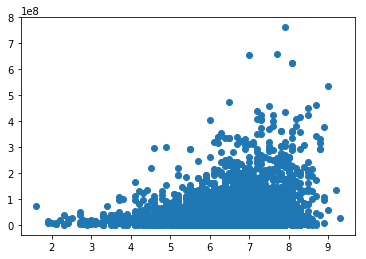

In [5]:
plt.scatter(X, y)


In [6]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression


model = LinearRegression()


In [7]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.


model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[14349640.65906165]]
y-axis intercept:  [-40333548.9552104]


In [9]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1.6]]
Max X Value: [[9.3]]


In [10]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

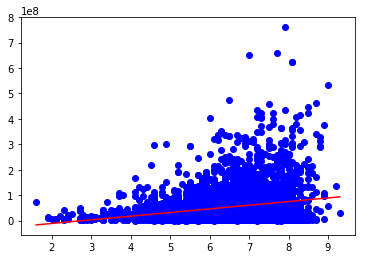

In [11]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')